In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install librosa numpy tensorflow matplotlib scikit-learn

In [6]:
import os
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers.legacy import Adam

In [7]:
import zipfile

zip_path = "/content/drive/My Drive/genres_original.zip"  # Update with correct path
extract_to = "/content/drive/My Drive/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction completed.")


Extraction completed.


In [8]:
import os
dataset_path = "/content/drive/My Drive/genres_original/"
print("Exists:", os.path.exists(dataset_path))


Exists: True


In [9]:
dataset_path_path = "/content/drive/My Drive/genres_original/"
# Check if genres exist
genres = os.listdir(dataset_path_path) #function to get a list of all the folders (which represent music genres) within the dataset_path. The list is stored in the genres variable.
print("Genres Available:", genres)


Genres Available: ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [10]:
import librosa
random_file_name = "/content/drive/My Drive/genres_original/blues/blues.00000.wav"

y, sr = librosa.load(random_file_name, sr=44100)
print("File loaded successfully!")


File loaded successfully!


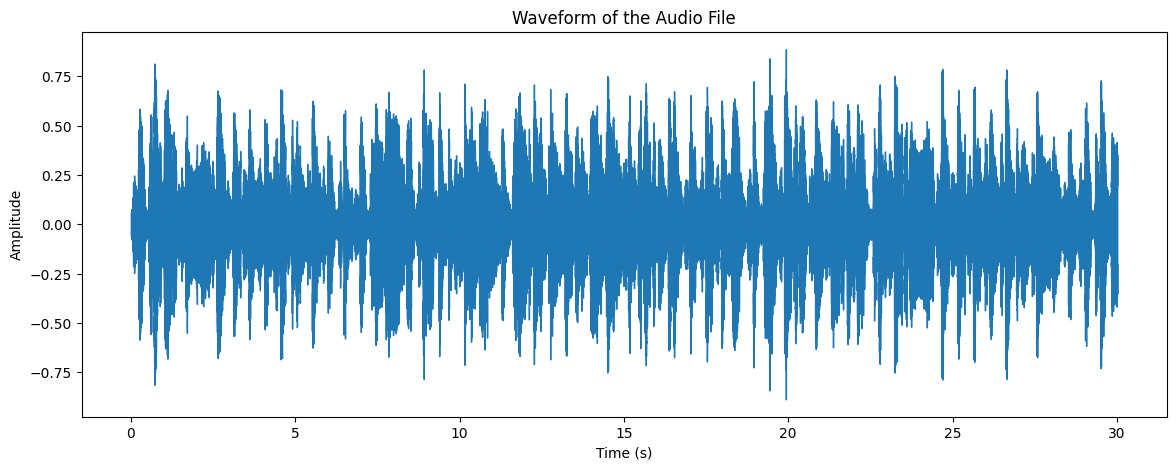

In [11]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of the Audio File")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [12]:
y # y is a NumPy array containing the audio time series (waveform). It represents the amplitude of the sound wave at each time step.
print("array:",y)
sr #sr is the sampling rate (default is 22050 Hz), which indicates how many samples per second are taken from the original audio.
print("Sampling rate:",sr)

array: [ 0.00734921  0.01335782  0.01657648 ... -0.07293833 -0.06308185
 -0.03151622]
Sampling rate: 44100


In [13]:
y.shape

(1323588,)

In [14]:
from IPython.display import Audio
Audio(data=y,rate=sr)

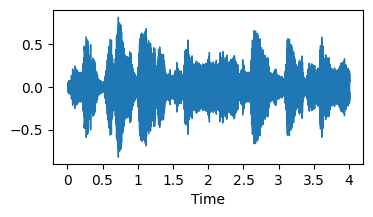

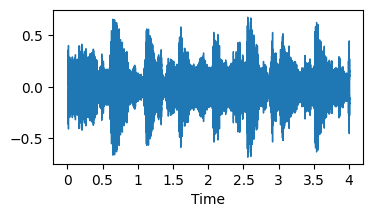

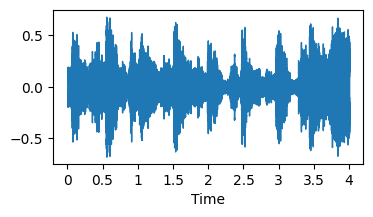

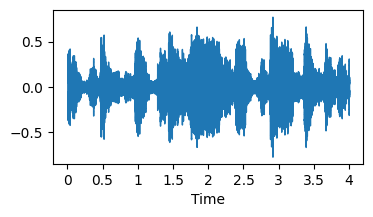

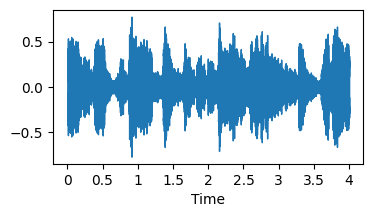

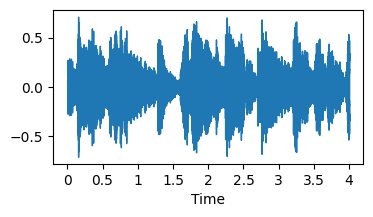

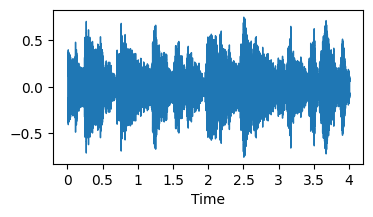

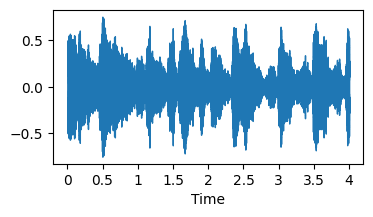

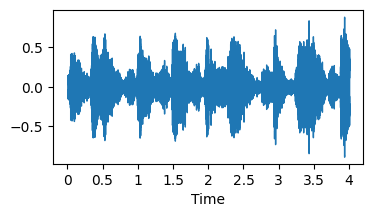

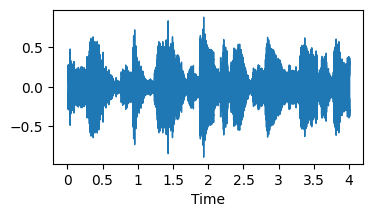

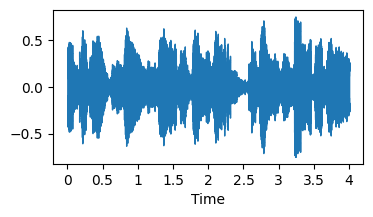

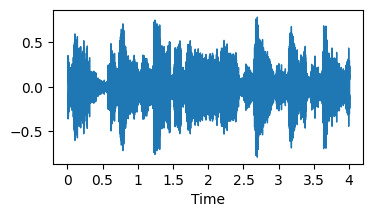

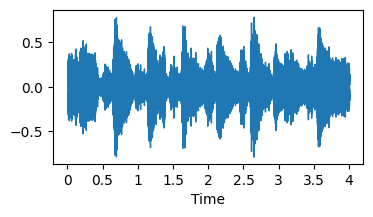

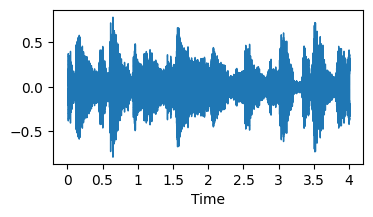

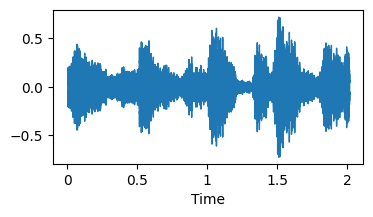

In [15]:
audio_path = "/content/drive/My Drive/genres_original/blues/blues.00000.wav"
y, sr = librosa.load(audio_path, sr=None)  # sr=None to keep the original sampling rate

# Define the duration of each chunk and overlap
chunk_duration = 4  # seconds
overlap_duration = 2  # seconds

# Convert durations to samples
chunk_samples = chunk_duration * sr
overlap_samples = overlap_duration * sr

# Calculate the number of chunks
num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

# Iterate over each chunk
for i in range(num_chunks):
    # Calculate start and end indices of the chunk
    start = i * (chunk_samples - overlap_samples)
    end = start + chunk_samples

    # Extract the chunk of audio
    chunk = y[start:end]
    plt.figure(figsize=(4, 2))
    librosa.display.waveshow(chunk, sr=sr)
    plt.show()


In [16]:
#Plotting Melspectrogram of Entire Audio
def plot_melespectrogram(y,sr):
    #Compute spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y,sr=sr)
    #Convert to decibels (log scale)
    spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)
    #Visualize the spectrogram
    plt.figure(figsize=(10,4))
    librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
    plt.colorbar(format='%2.0f dB')
    plt.title("Spectrogram")
    plt.tight_layout()
    plt.show()

In [17]:
random_file_name = "/content/drive/My Drive/genres_original/blues/blues.00000.wav"
y,sr = librosa.load(random_file_name,sr=44100)

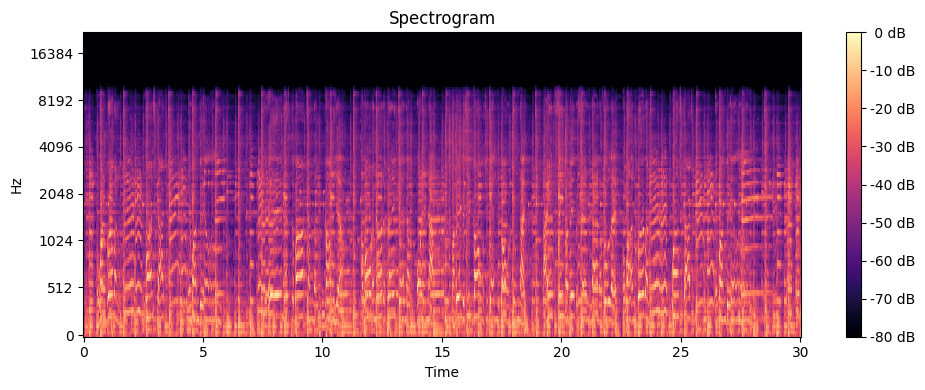

In [18]:
plot_melespectrogram(y,sr)

In [19]:
def plot_melspectrogram_chunks(y,sr):
    #define the duration of each chunk and overlap
    chunk_duration = 4
    overlap_duration = 2

    #Convert duration to sample
    chunk_samples = chunk_duration * sr
    overlap_samples = overlap_duration * sr

    #Calculate the number of chunks
    num_chunks = int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples)))+1

    #iterate over each chunks
    for i in range(num_chunks):
        #Calculate start and end indices of the chunk
        start = i*(chunk_samples-overlap_samples)
        end = start+chunk_samples
        #Extract the chunk audio
        chunk = y[start:end]
        #Melspectrogram part
        spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sr)
        print(spectrogram.shape)
        spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)
        #Visualize the spectrogram
        plt.figure(figsize=(10,4))
        librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
        plt.colorbar(format='%2.0f dB')
        plt.title("Spectrogram")
        plt.tight_layout()
        plt.show()

In [20]:
random_file_name = "/content/drive/My Drive/genres_original/blues/blues.00000.wav"
y,sr = librosa.load(random_file_name,sr=44100)

(128, 345)


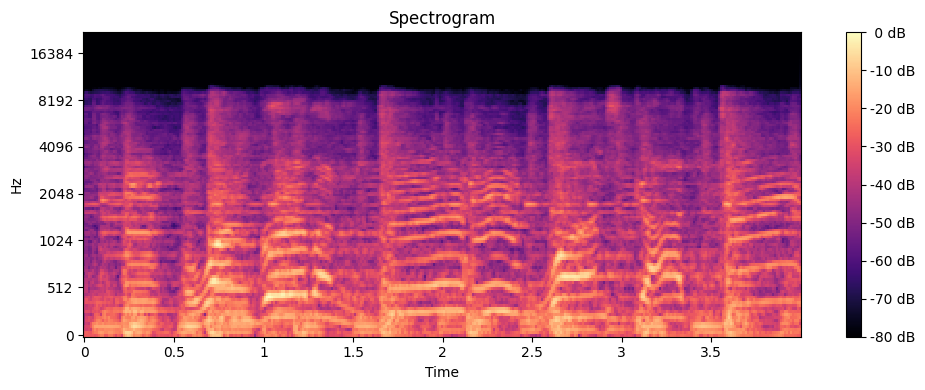

(128, 345)


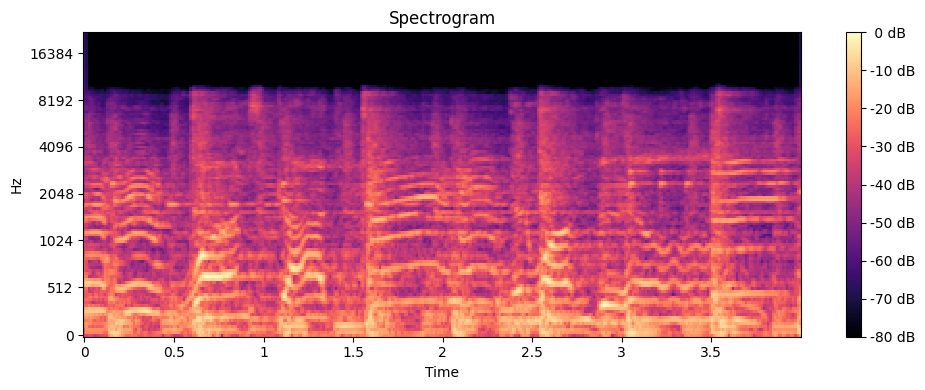

(128, 345)


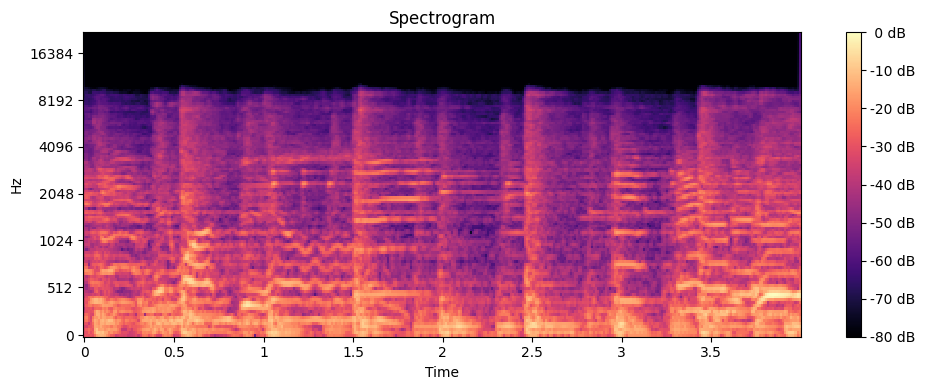

(128, 345)


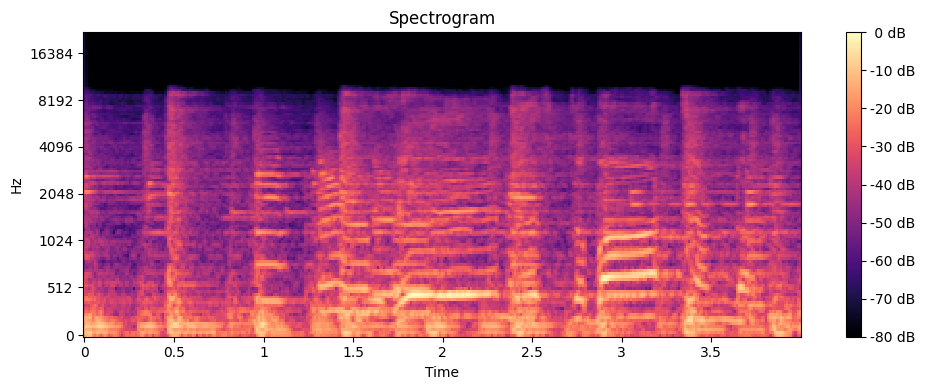

(128, 345)


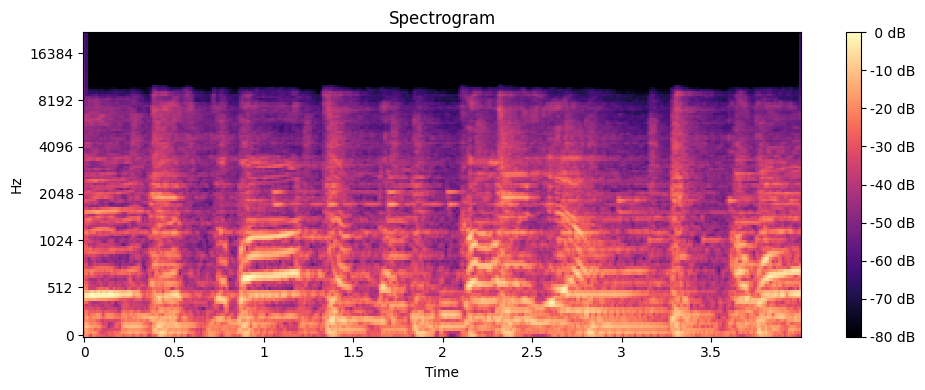

(128, 345)


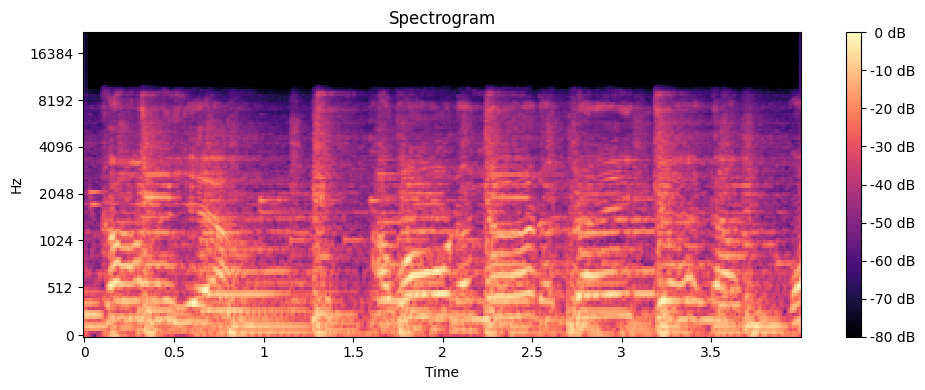

(128, 345)


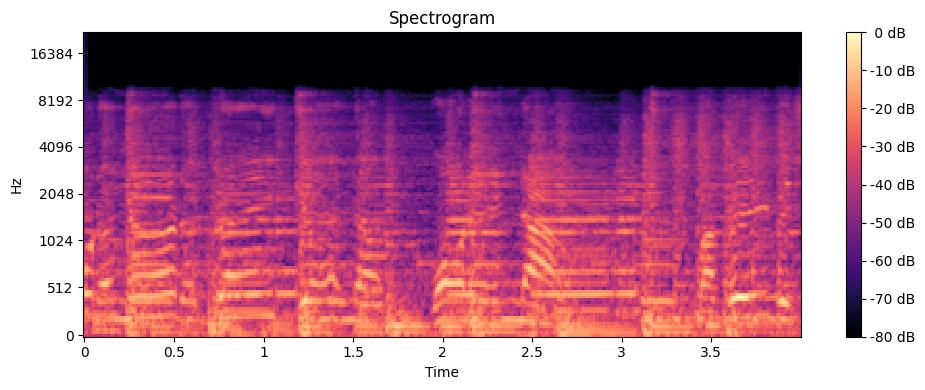

(128, 345)


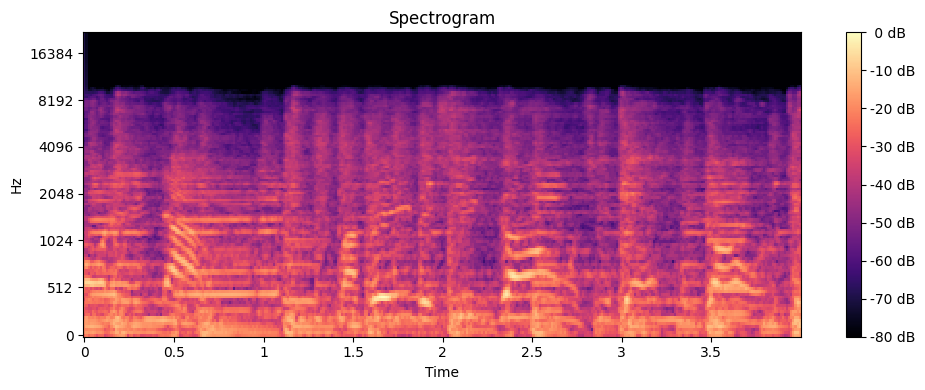

(128, 345)


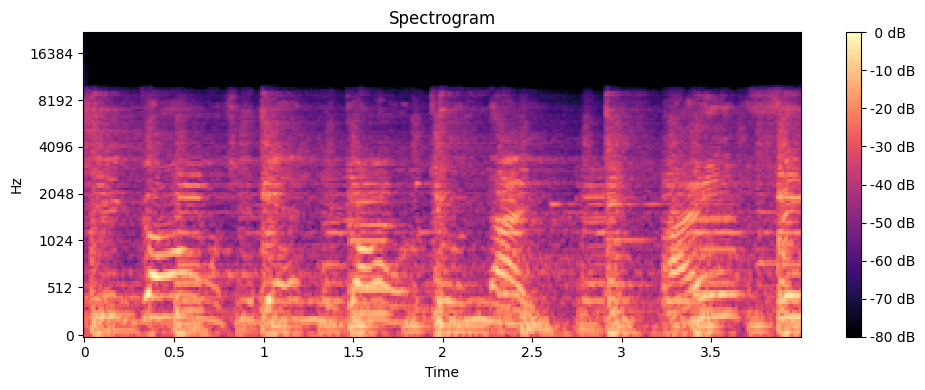

(128, 345)


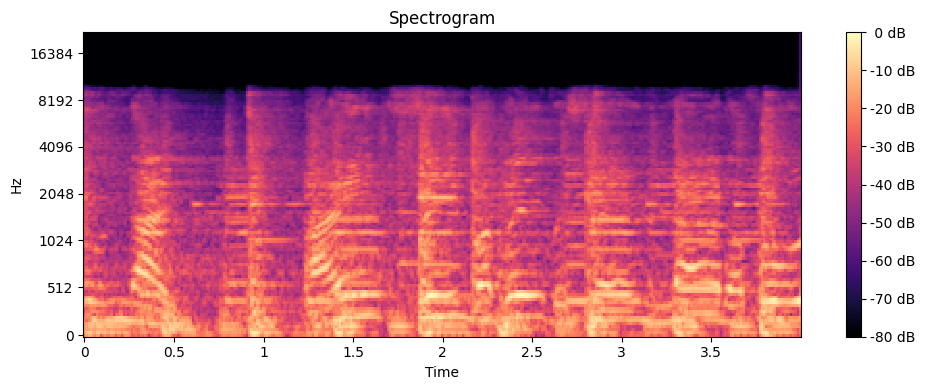

(128, 345)


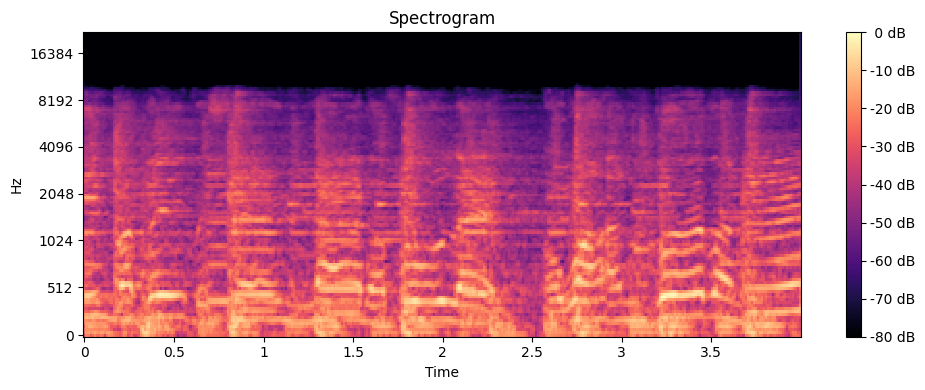

(128, 345)


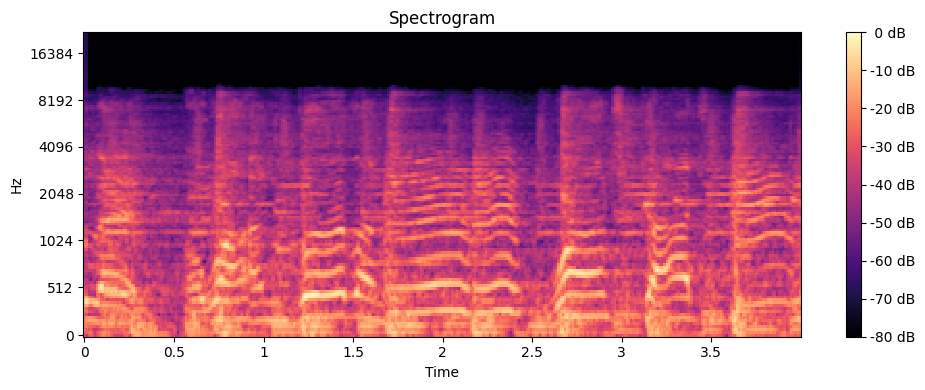

(128, 345)


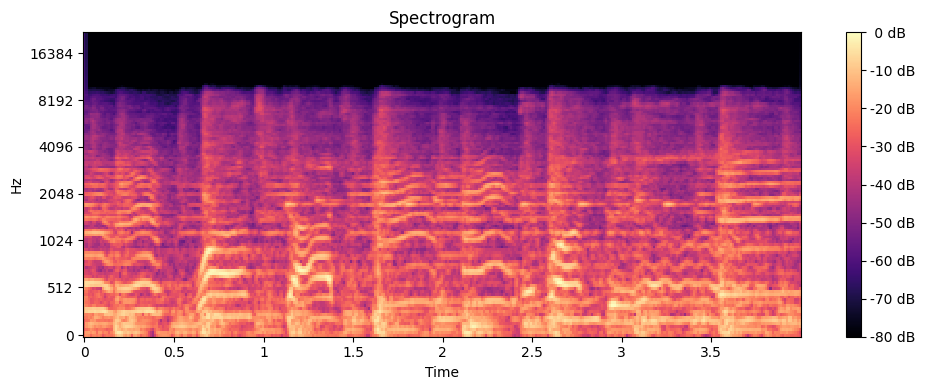

(128, 345)


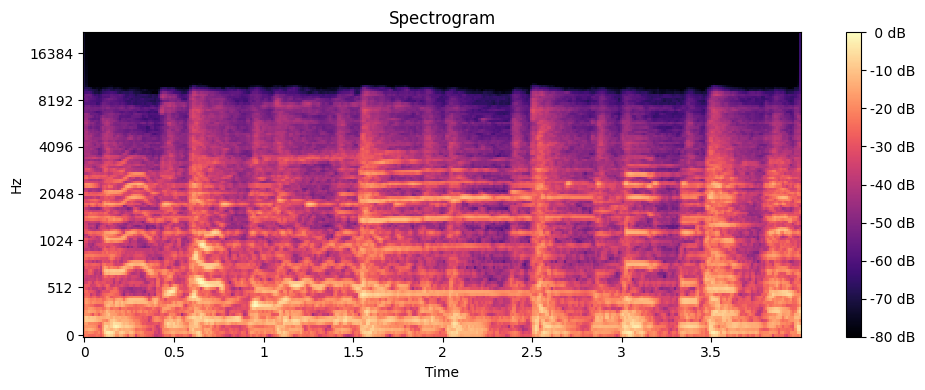

(128, 174)


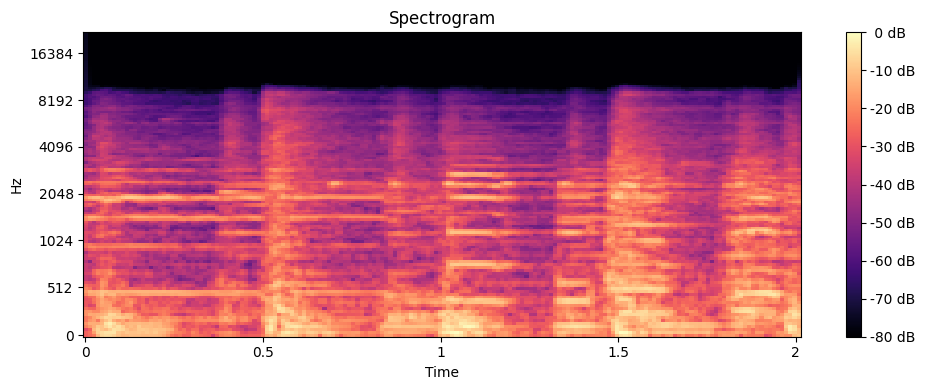

In [21]:
plot_melspectrogram_chunks(y,sr)

In [22]:
#define your folder structure
data_dir = "/content/drive/My Drive/genres_original/"
classes = ['blues', 'classical','country','disco','hiphop','metal','pop','reggae','rock']

In [23]:
from tensorflow.image import resize
#Load and preprocess audio data
def load_and_preprocess_data(data_dir,classes,target_shape=(150,150)):
    data=[]
    labels=[]

    for i_class,class_name in enumerate(classes):
        class_dir = os.path.join(data_dir,class_name)
        print("Processing--",class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir,filename)
                audio_data,sample_rate = librosa.load(file_path,sr=None)
                #Performing Preprocessing
                #define the duration of each chunk and overlap
                chunk_duration = 4
                overlap_duration = 2

                #Convert duration to sample
                chunk_samples = chunk_duration * sample_rate
                overlap_samples = overlap_duration * sample_rate

                #Calculate the number of chunks
                num_chunks = int(np.ceil((len(audio_data)-chunk_samples)/(chunk_samples-overlap_samples)))+1

                #iterate over each chunks
                for i in range(num_chunks):
                    #Calculate start and end indices of the chunk
                    start = i*(chunk_samples-overlap_samples)
                    end = start+chunk_samples
                    #Extract the chunk audio
                    chunk = audio_data[start:end]
                    #Melspectrogram part
                    mel_spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sample_rate)
                    #Resize matrix based on provided target shape
                    mel_spectrogram = resize(np.expand_dims(mel_spectrogram,axis=-1),target_shape)
                    #Append data to list
                    data.append(mel_spectrogram)
                    labels.append(i_class)
    #Return
    return np.array(data),np.array(labels)

In [24]:
data,labels = load_and_preprocess_data(data_dir,classes)

Processing-- blues
Processing-- classical
Processing-- country
Processing-- disco
Processing-- hiphop
Processing-- metal
Processing-- pop
Processing-- reggae
Processing-- rock


In [25]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels,num_classes = len(classes)) # Converting labels to one-hot encoding
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,test_size=0.2,random_state=42)

In [27]:
model = tf.keras.models.Sequential()

In [28]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [30]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [31]:
model.add(Dropout(0.3))

In [32]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [33]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [34]:
model.add(Dropout(0.3))

In [35]:
model.add(Flatten())

In [36]:
model.add(Dense(units=1200,activation='relu'))

In [37]:
model.add(Dropout(0.45))

In [38]:
#Output layer
model.add(Dense(units=len(classes),activation='softmax'))

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 148, 148, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 74, 74, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 36, 36, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 17, 17, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 5, 5, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1200)                │       2,458,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │          10,809 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 7,181,257 (27.39 MB)

 Trainable params: 7,181,257 (27.39 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
from tensorflow.keras.optimizers import Adam
#Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
#Training Model
training_history = model.fit(X_train,Y_train,epochs=30,batch_size=32,validation_data=(X_test,Y_test))


Epoch 1/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 60s 129ms/step - accuracy: 0.2085 - loss: 2.0701 - val_accuracy: 0.4741 - val_loss: 1.5280
Epoch 2/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 28s 84ms/step - accuracy: 0.4854 - loss: 1.4453 - val_accuracy: 0.5389 - val_loss: 1.2366
Epoch 3/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 40s 82ms/step - accuracy: 0.5949 - loss: 1.1482 - val_accuracy: 0.6572 - val_loss: 1.0106
Epoch 4/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 41s 81ms/step - accuracy: 0.6684 - loss: 0.9548 - val_accuracy: 0.7061 - val_loss: 0.8432
Epoch 5/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 42s 85ms/step - accuracy: 0.7205 - loss: 0.8096 - val_accuracy: 0.7439 - val_loss: 0.7535
Epoch 6/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 41s 84ms/step - accuracy: 0.7554 - loss: 0.7015 - val_accuracy: 0.7735 - val_loss: 0.6679
Epoch 7/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 40s 82ms/step - accuracy: 0.7925 - loss: 0.6137 - val_accuracy: 0.7943 - val_loss: 0.5929
Epoch 8/30
338/338 ━━━━━━━━━━━━━━━━━━━━ 41s 82ms/step - accuracy: 0.8156 - loss: 0.5259 -

In [42]:
model.save("Trained_model.h5") #Windows

In [43]:

training_history.history

{'accuracy': [0.282431423664093,
  0.5128799080848694,
  0.6194403171539307,
  0.6771682500839233,
  0.724888801574707,
  0.7593587636947632,
  0.797627866268158,
  0.8147702217102051,
  0.851464033126831,
  0.8736100792884827,
  0.8924202919006348,
  0.9065974950790405,
  0.9169755578041077,
  0.9288361668586731,
  0.9423646926879883,
  0.9457931518554688,
  0.9516308307647705,
  0.9551519751548767,
  0.9614529013633728,
  0.9694218039512634,
  0.9668272733688354,
  0.9642327427864075,
  0.9768347144126892,
  0.9788732528686523,
  0.9761860370635986,
  0.9751667976379395,
  0.9814677834510803,
  0.980077862739563,
  0.9791512489318848,
  0.9805411696434021],
 'loss': [1.9194936752319336,
  1.3762553930282593,
  1.0969092845916748,
  0.9344363212585449,
  0.7978127598762512,
  0.7019214034080505,
  0.5924931168556213,
  0.5275834202766418,
  0.4316144287586212,
  0.37358561158180237,
  0.31813472509384155,
  0.2714918255805969,
  0.2411062866449356,
  0.20822840929031372,
  0.170064762

In [44]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [45]:
X_train

array([[[[2.16458030e-02],
         [2.84843985e-02],
         [2.62774471e-02],
         ...,
         [2.74668317e-02],
         [3.07752490e-02],
         [5.14375381e-02]],

        [[1.67185385e-02],
         [1.06357420e-02],
         [8.69153719e-03],
         ...,
         [1.13777015e-02],
         [1.41660422e-02],
         [2.79521514e-02]],

        [[4.21777703e-02],
         [4.53175083e-02],
         [3.84430662e-02],
         ...,
         [2.65855435e-02],
         [4.31285277e-02],
         [3.49732302e-02]],

        ...,

        [[7.70925726e-06],
         [2.74178933e-06],
         [1.18034097e-06],
         ...,
         [1.22775953e-06],
         [1.66842699e-06],
         [4.83745271e-06]],

        [[8.15748172e-06],
         [2.62513367e-06],
         [1.26639100e-06],
         ...,
         [1.05716424e-06],
         [1.49623361e-06],
         [4.94950382e-06]],

        [[7.25242489e-06],
         [2.58070941e-06],
         [1.37585539e-06],
         ...,
 

In [46]:
#Reloading model variable
model = tf.keras.models.load_model("Trained_model.h5")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 148, 148, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 74, 74, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 36, 36, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 17, 17, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 5, 5, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1200)                │       2,458,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │          10,809 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 7,181,259 (27.39 MB)

 Trainable params: 7,181,257 (27.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [47]:
#Reloading Training history
import json
with open("training_hist.json",'r') as json_file:
    training_history_data = json.load(json_file)

In [48]:

training_history_data.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [49]:
#Model evaluation on Training set
train_loss,train_accuracy = model.evaluate(X_train,Y_train)

338/338 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9928 - loss: 0.0219


In [50]:
train_loss,train_accuracy

(0.0243497546762228, 0.9920311570167542)

In [51]:
#Model evaluation on Validation set
val_loss,val_accuracy = model.evaluate(X_test,Y_test)

85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9032 - loss: 0.4114


In [52]:
val_loss,val_accuracy

(0.4081543982028961, 0.9006671905517578)

In [53]:
training_history_data['val_loss']

[1.5280091762542725,
 1.2365655899047852,
 1.0105994939804077,
 0.843204140663147,
 0.7535080313682556,
 0.6679473519325256,
 0.5928630828857422,
 0.6502942442893982,
 0.49358102679252625,
 0.501394510269165,
 0.5646463632583618,
 0.4387608468532562,
 0.3957228660583496,
 0.36389580368995667,
 0.451871395111084,
 0.4241892695426941,
 0.34825459122657776,
 0.35849201679229736,
 0.3283419907093048,
 0.3462296426296234,
 0.7222810983657837,
 0.2929041087627411,
 0.3685075044631958,
 0.42619332671165466,
 0.344291090965271,
 0.3188241720199585,
 0.36668241024017334,
 0.36545222997665405,
 0.30674320459365845,
 0.4081543982028961]

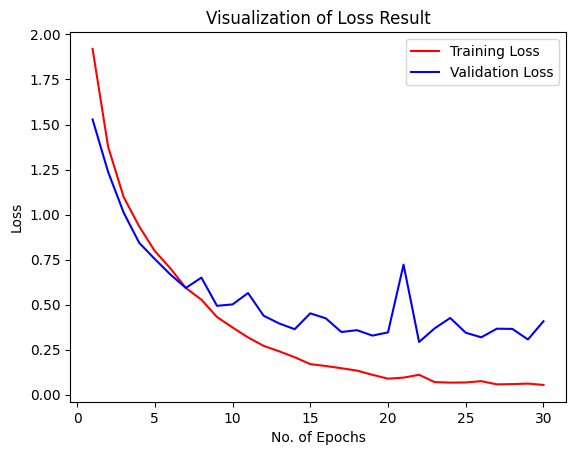

In [54]:
#Visualization of Loss
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history_data['loss'],label="Training Loss",color='red')
plt.plot(epochs,training_history_data['val_loss'],label="Validation Loss",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss Result")
plt.legend()
plt.show()

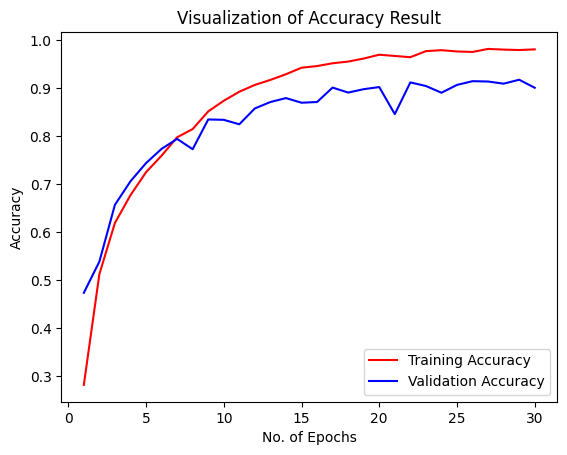

In [55]:
#Visualization of Accuracy
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history_data['accuracy'],label="Training Accuracy",color='red')
plt.plot(epochs,training_history_data['val_accuracy'],label="Validation Accuracy",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [56]:
X_test.shape

(2698, 150, 150, 1)

In [57]:
y_pred = model.predict(X_test)
y_pred

85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step


array([[1.19117127e-09, 7.20697457e-08, 9.99988198e-01, ...,
        1.91335999e-07, 1.53164204e-10, 1.14189197e-05],
       [9.33006883e-01, 1.65787296e-05, 6.64954036e-02, ...,
        8.41789515e-05, 4.91622050e-05, 3.37825652e-04],
       [2.04093104e-10, 1.36609204e-08, 9.99999881e-01, ...,
        2.78087526e-08, 1.37638823e-09, 1.01465766e-07],
       ...,
       [7.52917173e-12, 5.19674513e-16, 5.77882214e-15, ...,
        2.05720663e-01, 2.84704400e-12, 4.38120623e-10],
       [4.79909068e-05, 6.20296123e-05, 9.97664332e-01, ...,
        3.59283848e-04, 2.19388297e-04, 8.15342446e-06],
       [8.08455866e-07, 2.56427995e-07, 1.05752451e-05, ...,
        8.51071263e-07, 5.67396441e-09, 2.70882938e-02]], dtype=float32)

In [58]:
y_pred.shape

(2698, 9)

In [59]:
predicted_categories = np.argmax(y_pred,axis=1)
predicted_categories

array([2, 0, 2, ..., 4, 2, 5])

In [60]:
Y_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
Y_test.shape

(2698, 9)

In [62]:
true_categories = np.argmax(Y_test,axis=1)
true_categories

array([2, 0, 2, ..., 6, 2, 5])

In [63]:
classes

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'metal',
 'pop',
 'reggae',
 'rock']

In [64]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(true_categories,predicted_categories)
# Precision Recall F1score
print(classification_report(true_categories,predicted_categories,target_names=classes))

              precision    recall  f1-score   support

       blues       0.93      0.91      0.92       316
   classical       0.96      0.99      0.97       291
     country       0.88      0.87      0.88       326
       disco       0.94      0.89      0.91       289
      hiphop       0.87      0.94      0.90       295
       metal       0.97      0.93      0.95       298
         pop       0.84      0.89      0.86       318
      reggae       0.96      0.86      0.91       273
        rock       0.79      0.84      0.81       292

    accuracy                           0.90      2698
   macro avg       0.90      0.90      0.90      2698
weighted avg       0.90      0.90      0.90      2698



In [65]:
cm

array([[286,   0,  12,   2,   0,   0,   2,   3,  11],
       [  1, 287,   0,   0,   0,   0,   1,   0,   2],
       [  7,   0, 284,   5,   0,   2,   5,   2,  21],
       [  1,   1,   0, 257,   2,   0,  15,   0,  13],
       [  0,   4,   0,   0, 277,   1,  11,   2,   0],
       [  0,   0,   4,   0,   2, 278,   0,   0,  14],
       [  3,   0,   3,   3,  22,   0, 282,   1,   4],
       [  6,   1,   4,   1,  13,   0,  12, 234,   2],
       [  4,   6,  15,   5,   3,   6,   7,   1, 245]])

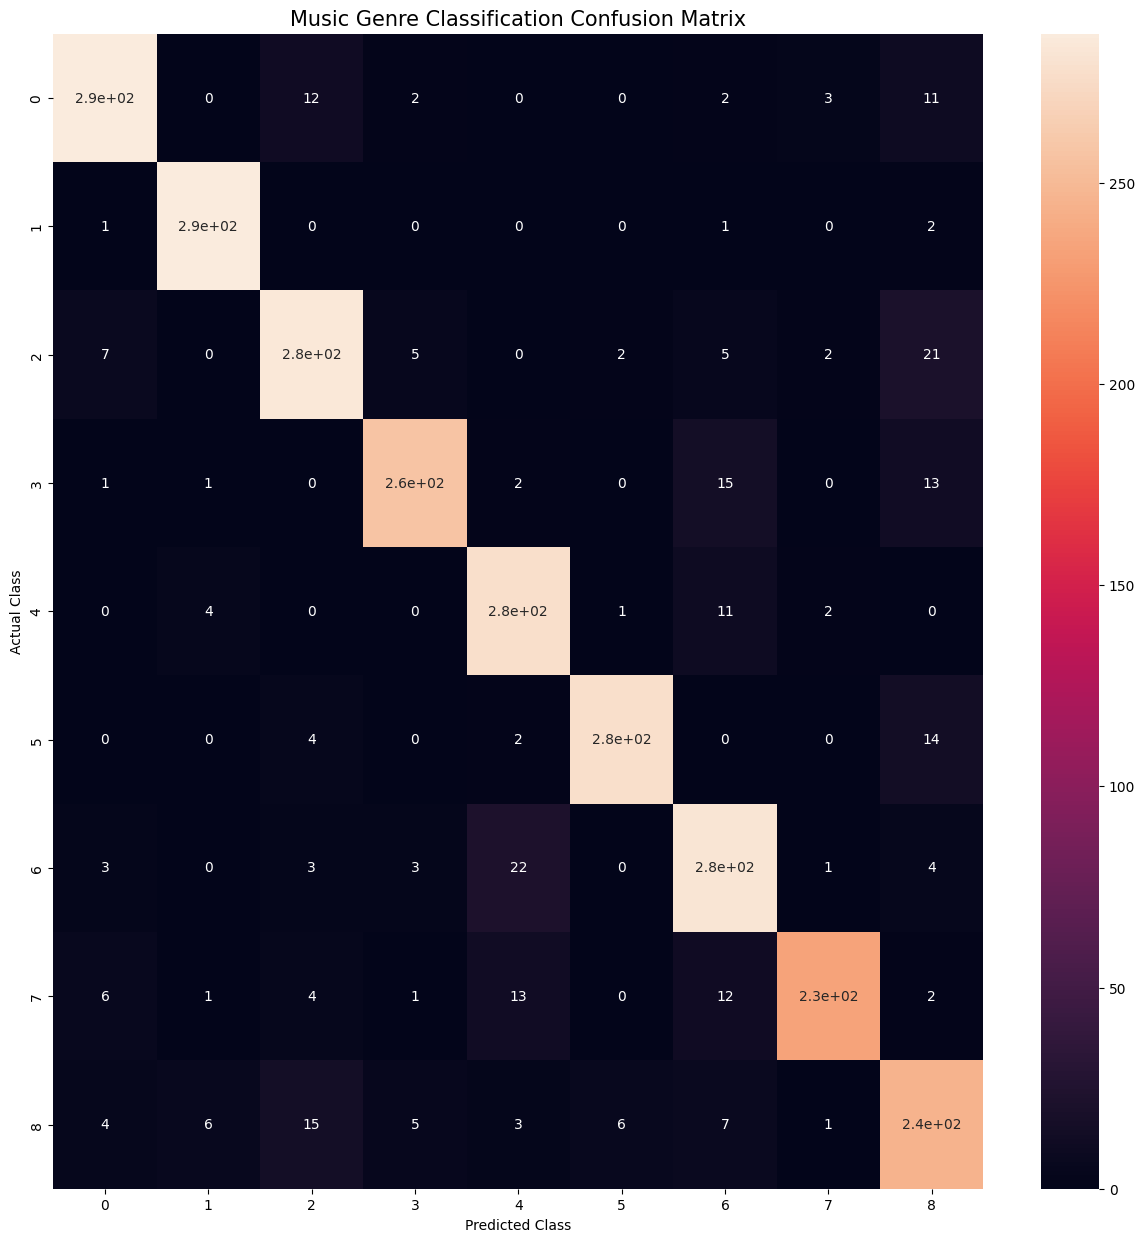

In [66]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True,annot_kws={"size":10})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Music Genre Classification Confusion Matrix",fontsize=15)
plt.show()